# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

img = Image.open('panda.jpg')
w, h = img.size
img = img.resize((w//4, h//4)) 


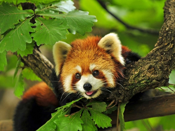

In [2]:
img

In [14]:
X = np.array(img)
if X.ndim == 3:
    channels = []
    U_matrices = []
    S_vectors = []
    VT_matrices = []
    for i in range(X.shape[2]): 
        channel =X[:, :, i]
        U, S, VT = np.linalg.svd(channel, full_matrices=False)  
        channels.append(channel)
        U_matrices.append(U)
        S_vectors.append(S)
        VT_matrices.append(VT)

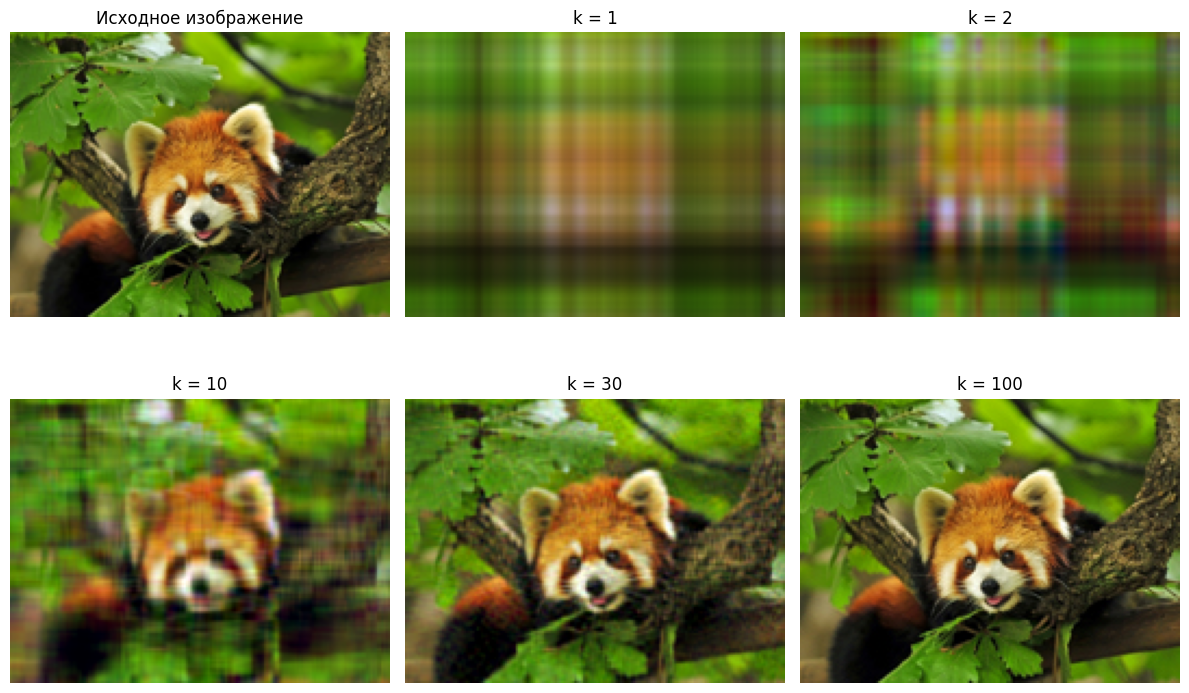

In [18]:
def reconstruct_image(k):
    if X.ndim == 3:
        channels_reconstructed = []
        for i in range(X.shape[2]):
            U = U_matrices[i]
            S = S_vectors[i]
            VT = VT_matrices[i]
            X_k = U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]
            X_k = np.clip(X_k, 0, 255)
            channels_reconstructed.append(X_k.astype(np.uint8))
        return np.stack(channels_reconstructed, axis=2)
    
k_values = [1, 2, 10, 30, 100]

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
if X.ndim == 3:
    plt.imshow(X)
plt.title('Исходное изображение')
plt.axis('off')

for i, k in enumerate(k_values, start=2):
    img_recon = reconstruct_image(k)
    plt.subplot(2, 3, i)
    if X.ndim == 3:
        plt.imshow(img_recon)
    plt.title(f'k = {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
original_size = X.nbytes
print(f"Исходный размер: {original_size}")
print()

if X.ndim == 3:
    m, n, _ = X.shape
else:
    m, n = X.shape

for k in k_values:
    size_U = m * k * 8     
    size_S = k * 8
    size_VT = n * k * 8
    total_size_k = size_U + size_S + size_VT
    
    if X.ndim == 3:
        total_size_k *= 3
    
    ratio = original_size / total_size_k

    print(f"k = {k}:")
    print(f"  Размер хранения: {total_size_k}")
    print(f"  Коэффициент сжатия: {ratio:.2f}")

Исходный размер: 68775

k = 1:
  Размер хранения: 7368
  Коэффициент сжатия: 9.33
k = 2:
  Размер хранения: 14736
  Коэффициент сжатия: 4.67
k = 10:
  Размер хранения: 73680
  Коэффициент сжатия: 0.93
k = 30:
  Размер хранения: 221040
  Коэффициент сжатия: 0.31
k = 100:
  Размер хранения: 736800
  Коэффициент сжатия: 0.09
